In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:

#load dataset
df_main = pd.read_csv('CAR DETAILS_ML.csv')

df_main.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Audi,2011,1190000,175900,Diesel,Dealer,Automatic,First Owner
1,Audi,2013,1735000,50000,Diesel,Dealer,Automatic,First Owner
2,Audi,2009,1250000,78000,Diesel,Dealer,Automatic,Third Owner
3,Audi,2014,1470000,34000,Diesel,Dealer,Automatic,Second Owner
4,Audi,2013,2800000,49000,Diesel,Dealer,Automatic,First Owner


In [32]:
df_main.dtypes

brand            object
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
Age               int64
dtype: object

In [33]:
df_main.columns

Index(['brand', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Age'],
      dtype='object')

In [3]:
df_main['Age'] = 2020 - df_main['year']
df_main.drop('year',axis=1,inplace = True)

# data processing


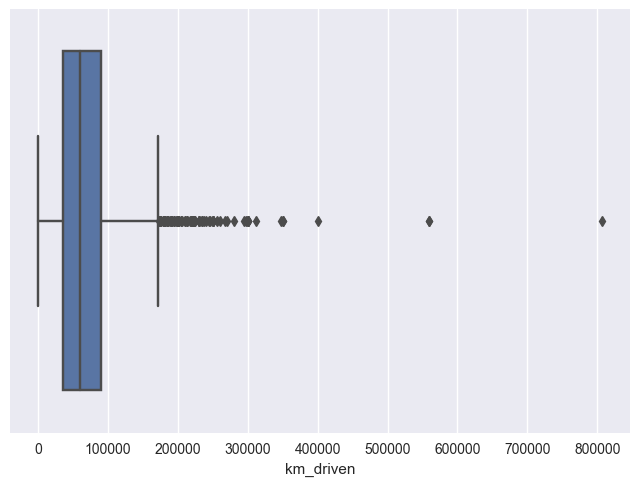

In [4]:
sns.boxplot(x=df_main['km_driven'])
plt.show()

In [5]:
print(df_main[df_main['km_driven']>300000].shape)

(8, 8)


In [6]:
df_main['km_driven'] = np.where(df_main['km_driven']>300000,300000,df_main['km_driven'])

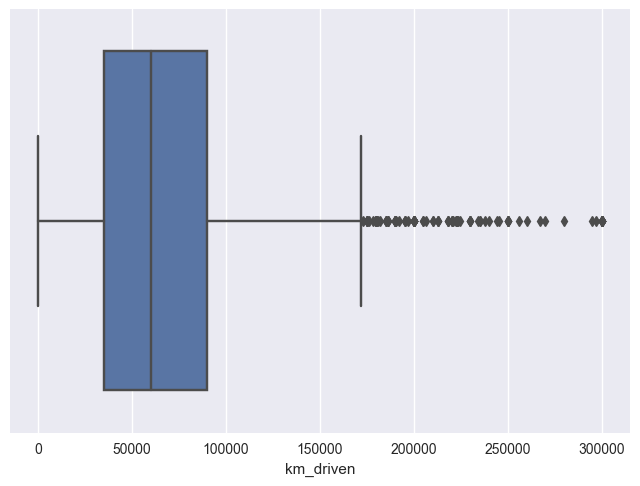

In [7]:
sns.boxplot(x=df_main['km_driven'])
plt.show()

In [8]:
x = df_main.drop('selling_price',axis=1)
y = df_main['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4304, 7)
(4304,)


### Split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
print(4304*0.25)

1076.0


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3228, 7)
(1076, 7)
(3228,)
(1076,)


### Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [13]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

### Import ML model building libraries

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
x_train.dtypes

brand           object
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
Age              int64
dtype: object

## Columns index that needs to undergo OneHotEncoding - [0,2,3,4,5]

### 1) LinearRegression

In [19]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse_output=False),[0,2,3,4,5])],
                              remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 176895.70195491225
MSE 120050796018.11838
RMSE 346483.4714934009
R2 Score 0.6411057465016152


### 2) Ridge Regression

In [20]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,2,3,4,5])],
                              remainder='passthrough')
step2 = Ridge(alpha=2.41)

pipe_rid = Pipeline([('step1',step1),('step2',step2)])

pipe_rid.fit(x_train,y_train)

ypred_rid = pipe_rid.predict(x_test)

eval_model(y_test,ypred_rid)

MAE 177215.77318750232
MSE 125545576946.15005
RMSE 354324.11284888594
R2 Score 0.6246789891229682


### 3) Lasso Regression


In [17]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,2,3,4,5])],
                              remainder='passthrough')
step2 = Lasso(alpha=0.234)

pipe_las = Pipeline([('step1',step1),('step2',step2)])

pipe_las.fit(x_train,y_train)

ypred_las = pipe_las.predict(x_test)

eval_model(y_test,ypred_las)

MAE 176894.33454879248
MSE 120052195121.5861
RMSE 346485.4904921505
R2 Score 0.6411015638538422


### 4) RandomForest Model

In [38]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,2,3,4,5])],
                              remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=11,random_state=5)

pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

MAE 138678.68079584953
MSE 115267034771.75488
RMSE 339509.99215303647
R2 Score 0.6554068963346328


### 5) Decision Tree Regressor

In [39]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,2,3,4,5])],
                              remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11,random_state=5)

pipe_dt = Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

MAE 147178.98553286633
MSE 122852727655.08284
RMSE 350503.5344402148
R2 Score 0.632729315885944


## Random Forrest model is best performing model in terms of RMSE value



In [25]:
import pickle

In [41]:
pickle.dump(pipe_dt,open('rf_model_car1.pkl','wb'))   # Saving the best performing model
pickle.dump(df_main,open('data_car1.pkl','wb'))              # Saving the dataset

In [36]:
print(df_main['brand'].unique())


['Audi' 'Bmw' 'Chevrolet' 'Datsun' 'Fiat' 'Ford' 'Honda' 'Hyundai'
 'Mahindra' 'Maruti' 'Mercedes-benz' 'Nissan' 'Renault' 'Skoda' 'Tata'
 'Toyota' 'Volkswagen']
